# boston house price using MLP

In [1]:
from __future__ import print_function
import keras
from keras.datasets import boston_housing
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Input,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Convolution2D

C:\Users\adm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料前處理

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(404, 13)
(404, 1)
(102, 13)
(102, 1)


# 模型建立

In [3]:
model = Sequential()
model.add(Dense(100,input_dim = 13))
model.add(BatchNormalization())
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(25,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(loss=keras.losses.mean_squared_error,optimizer=keras.optimizers.Adam())
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1400      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 25)                2525      
_________________________________________________________________
batch_normalization_3 (Batch (None, 25)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
__________

# 模型訓練

In [4]:
epochs = 20 #整批數據訓練次數
batch_size = 10 #一次訓練張數

model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test)
print('Test loss:', score)

Train on 404 samples, validate on 102 samples
Epoch 1/20
404/404 [==============================] - 3s 7ms/step - loss: 513.6924 - val_loss: 445.1736
Epoch 2/20
404/404 [==============================] - 0s 609us/step - loss: 439.4539 - val_loss: 388.7593
Epoch 3/20
404/404 [==============================] - 0s 560us/step - loss: 358.0240 - val_loss: 327.0585
Epoch 4/20
404/404 [==============================] - 0s 657us/step - loss: 256.2855 - val_loss: 200.3161
Epoch 5/20
404/404 [==============================] - 0s 558us/step - loss: 178.3139 - val_loss: 127.7274
Epoch 6/20
404/404 [==============================] - 0s 657us/step - loss: 119.9578 - val_loss: 118.9794
Epoch 7/20
404/404 [==============================] - 0s 637us/step - loss: 88.3078 - val_loss: 87.6963
Epoch 8/20
404/404 [==============================] - 0s 635us/step - loss: 71.6306 - val_loss: 99.5178
Epoch 9/20
404/404 [==============================] - 0s 672us/step - loss: 52.6637 - val_loss: 55.3320
Epoch 10

# 訓練結果展示

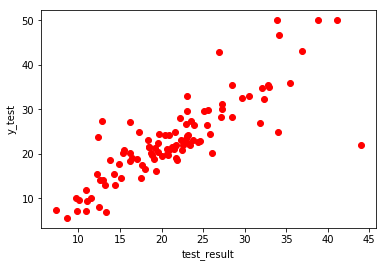

In [5]:
import numpy as np
test_data = x_test #第1-10比測試資料
test_result=model.predict(test_data)

plt.plot(test_result, y_test,'ro')
plt.xlabel('test_result')
plt.ylabel('y_test')
plt.show()
